In [1]:
# from evaluation import Scorer
from Vocabulary import Vocabulary
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [3]:

from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice
import os
import sys
import ssl
'''
No need for cider because it is single evaluation
'''
class Scorer():
    def __init__(self,ref,gt):
        self.ref = ref
        self.gt = gt
        self.word_based_scorers = [
            (Bleu(4), ["Bleu_1","Bleu_4"]),
            (Rouge(),"ROUGE"),
            (Meteor(), "Meteor"),
            (Cider(),"CIDEr")]


        
    def compute_scores(self):
        # blockPrint()
        total_scores = {
            "Bleu1":[],
            "Bleu4":[],
            "ROUGE":[],
            "Meteor":[],
            "CIDEr": []
            
        
        }

        for scorer, method in self.word_based_scorers:
            #print('computing %s score...'%(scorer.method()))
            # print(scorer)
            # print(method)
            score, scores = scorer.compute_score(self.ref, self.gt)
    
            if type(method) == list:
            #    for sc, scs, m in zip(score, scores, method):
                    # print("----------Bleu----------")
                    # print("%s: %0.3f"%(m, sc))
                total_scores["Bleu1"].append(score[0])
#                 total_scores["Bleu2"].append(score[1])
#                 total_scores["Bleu3"].append(score[2])
                total_scores["Bleu4"].append(score[3])
            else:
                # print("----------Other----------")
                # print("%s: %0.3f"%(method, score))
                # print(f"method is {method} total is {total_scores}")
                total_scores[method].append(score)
        # print(total_scores)
        
        # print('*****DONE*****')
        # enablePrint()
        return total_scores
    def compute_scores_iterative(self):


        total_scores = {
            "Bleu1":[],
            "Bleu4":[],
            "ROUGE":[],
            "Meteor":[]
        }

        for key in self.ref:
            
            curr_ref = {key:self.ref[key]}
            curr_gt = {key:self.gt[key]}

            for scorer, method in self.word_based_scorers:
                #print('computing %s score...'%(scorer.method()))
                # print(scorer)
                # print(method)
                #print(curr_gt)
                score, _ = scorer.compute_score(curr_ref, curr_gt)
                # print(score)
                if type(method) == list:
                    # for sc, scs, m in zip(score, scores, method):
                        # print("----------Bleu----------")
                        # print("%s: %0.3f"%(m, sc))
                    total_scores["Bleu1"].append(score[0])
                    total_scores["Bleu4"].append(score[3])
                else:
                    # print("----------Other----------")
                    # print("%s: %0.3f"%(method, score))
                    # print(f"method is {method} score is {score}")
                    total_scores[method].append(score)
                # print(score)
        
        # print('*****DONE*****')
        # print(total_scores)
        return total_scores
        # for key,value in total_scores.items():
        #     print('{}:{}'.format(key,value))

In [4]:
ref = {
           '1':['Slight variability in nuclear size shape and outline consistent with mild pleomorphism . There is a severe degree of crowding . Polarity is completely lost . Mitosis is frequent throughout the tissue . Prominent nucleoli are easily identified in low magnification scanning . High grade .',
                'Mild pleomorphism is present . There is a severe degree of crowding . Architecturally the cells show complete lack of polarity toward the surface urothelium . Mitosis is frequent throughout the tissue . The nucleoli of nuclei are prominent . High grade .', 
                'Mild pleomorphism is present . Nuclei are severely crowded together . There is marked disorganization and lack of cellular polarity toward the surface urothelium . Mitosis is frequent . Nucleoli is prominent . High grade .', 
                'Mild pleomorphism and cytologic atypia is present . The nuclei are crowded to a severe degree . Polarity is completely lost . There are frequent mitotic figures throughout the tissue . The nucleoli of nuclei are prominent . High grade .', 
                'Nuclear features show mild pleomorphism . There is a severe degree of crowding . Architecturally the cells show complete lack of polarity toward the surface urothelium . Mitotic figures including the atypical forms are frequently seen in all levels of the urothelium . Nucleoli is prominent . High grade .'],
            '2':['This is me.','This is he','This is she', 'This is me', 'This is me']}
gen = {
       '1':['mild pleomorphism . there are and prominent nucleoli are not observed or exceedingly rare and limited to .'],
        '2':["This is me"]}
scorer = Scorer(ref,gen)
tol_scores = scorer.compute_scores()
print(tol_scores)
# enablePrint()
print("fasf")

{'testlen': 21, 'reflen': 39, 'guess': [21, 19, 17, 15], 'correct': [13, 5, 2, 0]}
ratio: 0.5384615384477318
{'Bleu1': [0.2627069996797589], 'Bleu4': [1.4267738992082973e-05], 'ROUGE': [0.6048109965635738], 'Meteor': [0.1486687444679035], 'CIDEr': [2.2512549804426962]}
fasf


In [5]:
ref = {'1': ['Mild pleomorphism is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis is rare. The nuclei have inconspicuous nucleoli. Normal.'], '2': ['Nuclear features show mild pleomorphism. Pictured nuclei exhibit normal crowding. Polarity is not lost. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.'], '3': ['Nuclear features show mild pleomorphism. There are no signs of crowding in the nuclei. The nuclei retain a normal polarity. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.'], '4': ['Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis appears to be rare. The nuclei have inconspicuous nucleoli. Normal.'], '5': ['Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity of nuclei is negligibly lost. Mitosis is rare. Nucleoli is absent to inconspicuous. Normal.']}
gt = {'1': ['Nuclear features show mild pleomorphism. Pictured nuclei exhibit normal crowding. Polarity is not lost. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Nuclear features show mild pleomorphism. There are no signs of crowding in the nuclei. The nuclei retain a normal polarity. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis appears to be rare. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity of nuclei is negligibly lost. Mitosis is rare. Nucleoli is absent to inconspicuous. Normal.'], '2': ['Mild pleomorphism is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis is rare. The nuclei have inconspicuous nucleoli. Normal.', 'Nuclear features show mild pleomorphism. There are no signs of crowding in the nuclei. The nuclei retain a normal polarity. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis appears to be rare. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity of nuclei is negligibly lost. Mitosis is rare. Nucleoli is absent to inconspicuous. Normal.'], '3': ['Mild pleomorphism is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis is rare. The nuclei have inconspicuous nucleoli. Normal.', 'Nuclear features show mild pleomorphism. Pictured nuclei exhibit normal crowding. Polarity is not lost. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis appears to be rare. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity of nuclei is negligibly lost. Mitosis is rare. Nucleoli is absent to inconspicuous. Normal.'], '4': ['Mild pleomorphism is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis is rare. The nuclei have inconspicuous nucleoli. Normal.', 'Nuclear features show mild pleomorphism. Pictured nuclei exhibit normal crowding. Polarity is not lost. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Nuclear features show mild pleomorphism. There are no signs of crowding in the nuclei. The nuclei retain a normal polarity. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity of nuclei is negligibly lost. Mitosis is rare. Nucleoli is absent to inconspicuous. Normal.'], '5': ['Mild pleomorphism is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis is rare. The nuclei have inconspicuous nucleoli. Normal.', 'Nuclear features show mild pleomorphism. Pictured nuclei exhibit normal crowding. Polarity is not lost. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Nuclear features show mild pleomorphism. There are no signs of crowding in the nuclei. The nuclei retain a normal polarity. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. The nuclei have inconspicuous nucleoli. Normal.', 'Mild pleomorphism and cytologic atypia is present. There are no signs of crowding in the nuclei. Polarity along the basement membrane is negligibly lost. Mitosis appears to be rare. The nuclei have inconspicuous nucleoli. Normal.']}
print(ref.keys())
print(gt.keys())
scorer = Scorer(gt,ref)
tol_scores = scorer.compute_scores()
print(tol_scores)

dict_keys(['1', '2', '3', '4', '5'])
dict_keys(['1', '2', '3', '4', '5'])
{'testlen': 168, 'reflen': 160, 'guess': [168, 163, 158, 153], 'correct': [153, 132, 119, 108]}
ratio: 1.0499999999934375
{'Bleu1': [0.9107142857088648], 'Bleu4': [0.7913118488226517], 'ROUGE': [0.7892658643594385], 'Meteor': [0.5068251934337468], 'CIDEr': [0.0]}


In [6]:
!ls ../../../../../../srv/scratch/bic/peter/Report

class.json	      Images	  test_annotation.json
eval_annotation.json  Images.zip  train_annotation.json


In [7]:
base = "../../../../../../srv/scratch/bic/peter/Report"
train_name = "train_annotation.json"
eval_name = "eval_annotation.json"
test_name = "test_annotation.json"
train_path = os.path.join(base,train_name)
eval_path = os.path.join(base,eval_name)
test_path = os.path.join(base,test_name)


In [8]:
def read_file(file_path):
    # Read the JSON file
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)

    return data
#     # Extract the keys and print them
#     keys = list(data.keys())
#     # print("Keys:", keys)

#     # Print the first key-value pair
#     if keys:
#         first_key = keys[0]
#         first_value = data[first_key]['caption']
#         print("First Key:", first_key)
#         print("First Value:", first_value)
#     else:
#         print("The JSON file is empty.")
#     return data

In [16]:
train_data = read_file(train_path)
'''
Normal 0
Low Grade 1
High Grade 2
Insufficient 3
'''
a = [2,3,4,5]
for idx,val in enumerate(a):
    if val == 3:
        a[idx] = 5
print(a)

[2, 3, 4, 5]


In [22]:
key = list(train_data.keys())
print(train_data[key[10]])

{'caption': ['Moderate pleomorphism is present. Nuclei are mildly crowded together. There is marked disorganization and lack of cellular polarity toward the surface urothelium. There are frequent mitotic figures throughout the tissue. Nucleoli are prominent and irregular. High grade.', 'Nuclear features show moderate pleomorphism. Nuclei are mildly crowded together. Polarity is completely lost. There are frequent mitotic figures throughout the tissue. Prominent nucleoli are easily identified in low magnification scanning. High grade.', 'Nuclear features show moderate pleomorphism. The nuclei are crowded to a mild degree. There is marked disorganization and lack of cellular polarity toward the surface urothelium. There are frequent mitotic figures throughout the tissue. The nucleoli of nuclei are prominent. High grade.', 'Moderate pleomorphism is present. There is a mild degree of crowding. Architecturally the cells show complete lack of polarity toward the surface urothelium. Mitotic f

In [ ]:
train_data = read_file(train_path)
eval_data = read_file(eval_path)
test_data = read_file(test_path)

In [15]:
# Scorer setup
import random
# Random sampling
train_samp_key = random.sample(list(train_data.keys()),1200)
eval_samp_key = random.sample(list(eval_data.keys()),450)
test_samp_key = random.sample(list(test_data.keys()),500)

In [47]:
# a = train_data
def calc_stat(data_dict,name,pred,rest,key_num):
    
    data = data_dict[name]['caption']
    # pred = {}
    # rest = {}
    total_score = {
        'Bleu1':[],
        'Bleu4':[],
        'ROUGE':[],
        'Meteor':[],
        'CIDEr':[]
    }
    total_sum_score = {}
    for i in range(len(data)):
        key = str(key_num+i)
        pred[key] = [data[i]]
        rest[key] = data[:i] + data[i+1:]
        # pred = {key:[data[i]]}
        # rest = {key:data[:i] + data[i+1:]}
    return pred,rest
#     scorer = Scorer(rest,pred)
#     tol_scores = scorer.compute_scores()
#     # print(pred)
#     # print(rest)
#     # print(tol_scores)
#     total_score['Bleu1'].append(tol_scores['Bleu1'][0])
#     total_score['Bleu4'].append(tol_scores['Bleu4'][0])
#     total_score['ROUGE'].append(tol_scores['ROUGE'][0])
#     total_score['Meteor'].append(tol_scores['Meteor'][0])
#     total_score['CIDEr'].append(tol_scores['CIDEr'][0])
#     for key, value in total_score.items():
#         total_sum_score[key] = [np.mean(value),np.std(value)]
#     return total_score, total_sum_score


# b,c= calc_stat(train_data,'N2_07_2')
# print(b)
# print(c)

In [54]:
def get_all_stat(data_dict):
    pred = {}
    rest = {}
    all_stat = {
        'Bleu1':[],
        'Bleu4':[],
        'ROUGE':[],
        'Meteor':[],
        'CIDEr':[],
    }
    all_sum_stat = {
    }
    i = 1
    for key,value in data_dict.items():
        pred,rest = calc_stat(data_dict,key,pred,rest,i)
        #print(f"i = {i}")
        i += 5
    print(f"finished building this")
    scorer = Scorer(rest,pred)
    tol_scores = scorer.compute_scores()
    print(tol_scores)
    return tol_scores
    # all_stat['Bleu1'].extend(result['Bleu1'])
    # all_stat['Bleu4'].extend(result['Bleu4'])
    # all_stat['ROUGE'].extend(result['ROUGE'])
    # all_stat['Meteor'].extend(result['Meteor'])
    # all_stat['CIDEr'].extend(result['CIDEr'])
    #     all_sum_stat[key] = sum_result
    # return all_stat,all_sum_stat

In [55]:
def dict_sample(my_dict,k):
    # Randomly select k unique keys from the dictionary
    selected_keys = random.sample(list(my_dict.keys()), k)

    # Create a new dictionary with the selected key-value pairs
    selected_dict = {key: my_dict[key] for key in selected_keys}
    return selected_dict

In [56]:
print(type(train_data))

<class 'dict'>


In [57]:
# selected_train = dict_sample(train_data, 600)
# selected_eval = dict_sample(eval_data,300)
# selected_test = dict_sample(test_data,350)

In [58]:


from IPython.utils import io
#with io.capture_output() as captured:
get_all_stat(train_data)
    #all_train_stat,all_train_sum_stat = get_all_stat(train_data)

finished building this
{'testlen': 396145, 'reflen': 392164, 'guess': [396145, 384325, 372505, 360685], 'correct': [333286, 271077, 232248, 202678]}
ratio: 1.01015136524515
{'Bleu1': [0.8413232528493334], 'Bleu4': [0.6752488185548244], 'ROUGE': [0.6393684143564845], 'Meteor': [0.4101473123158665], 'CIDEr': [2.2323363674123877]}


In [61]:
#with io.capture_output() as captured:
get_all_stat(test_data)
    #all_test_stat,all_test_sum_stat = get_all_stat(selected_test)

finished building this
{'testlen': 174003, 'reflen': 172701, 'guess': [174003, 169003, 164003, 159003], 'correct': [146653, 120144, 103381, 90600]}
ratio: 1.0075390414647223
{'Bleu1': [0.8428188019746738], 'Bleu4': [0.6811039924846368], 'ROUGE': [0.632644059462228], 'Meteor': [0.409578656291857], 'CIDEr': [1.9111396152986508]}


In [62]:
#with io.capture_output() as captured:
get_all_stat(eval_data)
    #all_eval_stat,all_eval_sum_stat = get_all_stat(selected_eval)

finished building this
{'testlen': 155404, 'reflen': 153803, 'guess': [155404, 150959, 146514, 142069], 'correct': [130557, 106546, 91330, 79788]}
ratio: 1.0104094198422593
{'Bleu1': [0.8401135105917427], 'Bleu4': [0.6749897440669278], 'ROUGE': [0.623427282610474], 'Meteor': [0.40635594762530486], 'CIDEr': [1.8851065619551295]}


In [ ]:
# print(all_train_sum_stat)
print(all_train_stat.keys())

In [ ]:
def boxplot_metric(train_stat, test_stat, eval_stat):
    # classes = ['Train'] * len(train_stat['Bleu1']) + ['Eval'] * len(eval_stat['Bleu1']) + ['Test'] * len(test_stat['Bleu1'])
    # metrics = ['BLEU1', 'BLEU4', 'ROUGE'] * 3
    # # Create a box plot
    # score = []
    # all_data = [train_stat,eval_stat,test_stat]
    # for data in all_data:
    # #     for value in train_stat:
    #         score.extend(value)

    data = [
        ('Train', 'BLEU1', train_stat["Bleu1"]),
        ('Train', 'BLEU4', train_stat["Bleu4"]),
        ('Train', 'ROUGE', train_stat["ROUGE"]),
        ('Eval', 'BLEU1', eval_stat["Bleu1"]),
        ('Eval', 'BLEU4', eval_stat["Bleu4"]),
        ('Eval', 'ROUGE', eval_stat["ROUGE"]),
        ('Test', 'BLEU1', test_stat["Bleu1"]),
        ('Test', 'BLEU4', test_stat["Bleu4"]),
        ('Test', 'ROUGE', test_stat["ROUGE"]),
    ]
    df = pd.DataFrame(data, columns=['Class', 'Metric', 'Score'])
    df = df.explode('Score')
    # print(df)
    # # Create a pandas DataFrame from the data
    # df = pd.DataFrame(seaborn_data)

    # Create a box plot using Seaborn
    sns.set(style="whitegrid")  # Set the style
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Create the box plot
    sns.boxplot(x="Class", y="Score", hue="Metric", data=df)
    plt.legend(loc='upper right')
    # Customize the plot
    plt.title('Box Plot of Metrics for Different Classes')
    plt.xlabel('Class')
    plt.ylabel('Score')

    # Show the plot
    plt.show()

/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

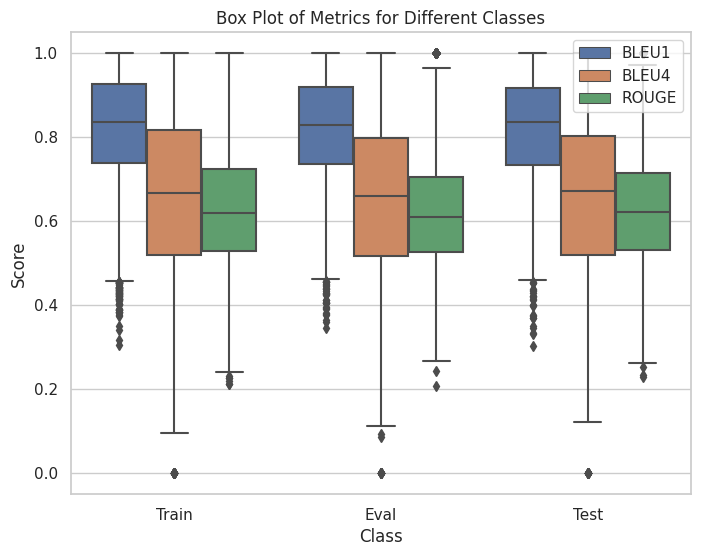

In [21]:
boxplot_metric(all_train_stat,all_test_stat,all_eval_stat)

/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

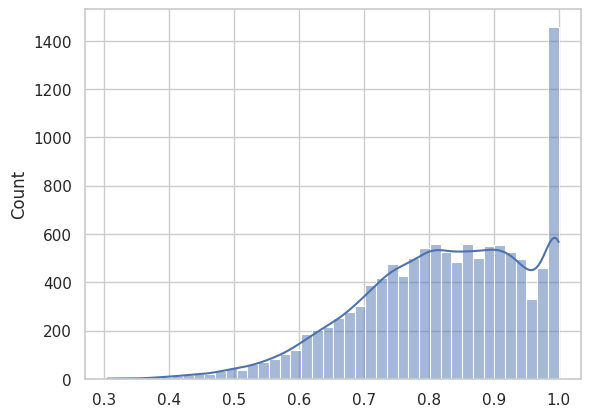

In [22]:
sns.histplot(data = all_train_stat["Bleu1"],kde=True)

In [23]:
# find the location of the biggest outlier, so lowest similarity
min_train_b1 = min(all_train_stat['Bleu1'])
print(f"min b1 is {min_train_b1} and pos is {all_train_stat['Bleu1'].index(min_train_b1)}")
min_train_b4 = min(all_train_stat['Bleu4'])
print(f"min b4 is {min_train_b4} and pos is {all_train_stat['Bleu4'].index(min_train_b4)}")
min_train_rouge = min(all_train_stat['ROUGE'])
print(f"min rouge is {min_train_rouge} and pos is {all_train_stat['ROUGE'].index(min_train_rouge)}")
print(list(train_data.keys())[int(all_train_stat['Bleu4'].index(min_train_b4)/5)])
train_data["115969_008"]

min b1 is 0.3061224489733445 and pos is 2426
min b4 is 1.558500916173644e-09 and pos is 2426
min rouge is 0.2115606936416185 and pos is 4286
115969_008


{'caption': ['Nuclear features show mild pleomorphism. Moderate crowding of the nuclei can be seen. The urothelium shows some degree of loss of polarity. Mitosis is rare throughout the tissue. Nucleoli is absent to inconspicuous. High grade.',
  'Mild pleomorphism and cytologic atypia is present. The nuclei are crowded to a moderate degree. Polarity is not completely lost toward the surface urothelium. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. Visible and prominent nucleoli are not observed or exceedingly rare. High grade.',
  'Slight variability in nuclear size shape and outline, consistent with mild pleomorphism. Nuclei are moderately crowded together. Architecturally no overt lack of polarity is observed. Mitosis is rare throughout the tissue. Nucleoli is absent to inconspicuous. High grade.',
  'Nuclear features show mild pleomorphism. Moderate nuclear crowding is seen. The urothelium shows some degree of loss of polarity. Mitosis is rare throu

In [24]:
gen = {'1':
      ['Mild pleomorphism and cytologic atypia is present. The nuclei are crowded to a moderate degree. Polarity is not completely lost toward the surface urothelium. Mitosis are exceedingly rare and limited only to the basal layer of urothelium. Visible and prominent nucleoli are not observed or exceedingly rare. High grade.'
      ]}


ref = {
    '1':['Nuclear features show mild pleomorphism. Moderate crowding of the nuclei can be seen. The urothelium shows some degree of loss of polarity. Mitosis is rare throughout the tissue. Nucleoli is absent to inconspicuous. High grade.',
  'Slight variability in nuclear size shape and outline, consistent with mild pleomorphism. Nuclei are moderately crowded together. Architecturally no overt lack of polarity is observed. Mitosis is rare throughout the tissue. Nucleoli is absent to inconspicuous. High grade.',
  'Nuclear features show mild pleomorphism. Moderate nuclear crowding is seen. The urothelium shows some degree of loss of polarity. Mitosis is rare throughout the tissue. The nuclei have inconspicuous nucleoli. High grade.',
  'Slight variability in nuclear size shape and outline, consistent with mild pleomorphism. Moderate crowding of the nuclei can be seen. There is no full-thickness lack of polarity observed. Mitosis is rare throughout the tissue. Nucleoli is absent to inconspicuous. High grade.']
}

scorer = Scorer(ref,gen)
tol_scores = scorer.compute_scores()
print(tol_scores)


{'testlen': 49, 'reflen': 41, 'guess': [49, 48, 47, 46], 'correct': [15, 2, 0, 0]}
ratio: 1.195121951190363
{'Bleu1': [0.3061224489733445], 'Bleu4': [1.558500916173644e-09], 'ROUGE': [0.21172387196297723]}


In [25]:
# for i in train_data.values():
#     if i['label'] == 3:
#         print(i['caption'][0])
#         print("-----------")

In [26]:
def calculate_data(all_stat,sum_stat):
    # from all_stat calculate total mean and variance for each stat
    total_bleu1_mean = np.mean(all_stat['Bleu1'])
    total_bleu1_std = np.std(all_stat['Bleu1'])
    total_bleu4_mean = np.mean(all_stat['Bleu4'])
    total_bleu4_std = np.std(all_stat['Bleu4'])
    total_rouge_mean = np.mean(all_stat["ROUGE"])
    total_rouge_std = np.std(all_stat['ROUGE'])
    print("Total Bleu1 Mean:", total_bleu1_mean)
    print("Total Bleu1 Std:", total_bleu1_std)
    print("Total Bleu4 Mean:", total_bleu4_mean)
    print("Total Bleu4 Std:", total_bleu4_std)
    print("Total Rouge Mean:", total_rouge_mean)
    print("Total Rouge Std:", total_rouge_std)

In [27]:
# all_train_stat['Bleu1']

In [28]:
# pd.Series(all_train_stat['Bleu1']).describe()
# pd.Series(all_train_stat['Bleu4']).describe()
# pd.Series(all_train_stat['ROUGE']).describe()

In [29]:
calculate_data(all_train_stat,all_train_sum_stat)

Total Bleu1 Mean: 0.8245329264901774
Total Bleu1 Std: 0.12781217745311563
Total Bleu4 Mean: 0.6648655885116892
Total Bleu4 Std: 0.2067598404617853
Total Rouge Mean: 0.6393684143564845
Total Rouge Std: 0.15908078613957474


In [30]:
calculate_data(all_eval_stat,all_eval_sum_stat)

Total Bleu1 Mean: 0.8178154359092934
Total Bleu1 Std: 0.1274715929732071
Total Bleu4 Mean: 0.6539107081095807
Total Bleu4 Std: 0.199849542094963
Total Rouge Mean: 0.623427282610474
Total Rouge Std: 0.14363432368960422


In [31]:
calculate_data(all_test_stat,all_test_sum_stat)

Total Bleu1 Mean: 0.819927935813276
Total Bleu1 Std: 0.12637439946545212
Total Bleu4 Mean: 0.660422955996771
Total Bleu4 Std: 0.1993342286178083
Total Rouge Mean: 0.632644059462228
Total Rouge Std: 0.1450695904270764


## Combine train test eval stat together

In [32]:
all_bleu1 = all_train_stat["Bleu1"]+all_eval_stat["Bleu1"]+all_test_stat["Bleu1"]
all_bleu4 = all_train_stat["Bleu4"]+all_eval_stat["Bleu4"]+all_test_stat["Bleu4"]
all_rouge = all_train_stat["ROUGE"]+all_eval_stat["ROUGE"]+all_test_stat["ROUGE"]
full_metric = pd.DataFrame({"Bleu1":all_bleu1,
              "Bleu4":all_bleu4,
              "ROUGE":all_rouge})

/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

Text(0.5, 1.0, 'Histogram for all text')

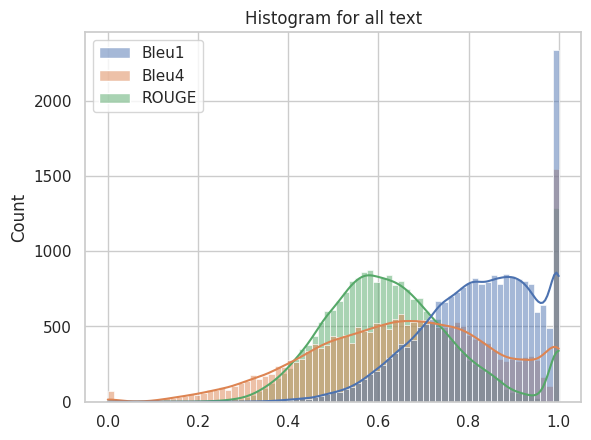

In [33]:
sns.histplot(data = full_metric,kde=True)
plt.title("Histogram for all text")

/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Violin Plot for all text')

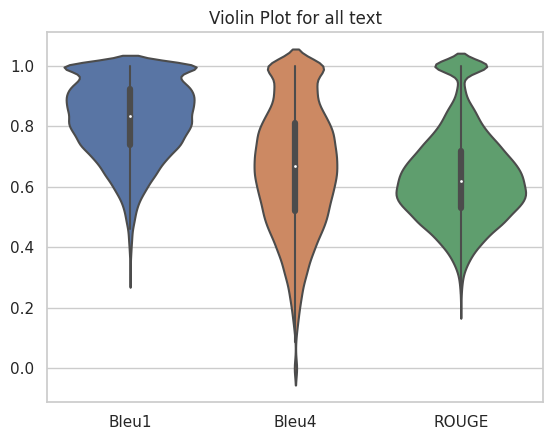

In [34]:
sns.violinplot(data=full_metric)
plt.title("Violin Plot for all text")

/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/z5313504/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Box Plot for all text')

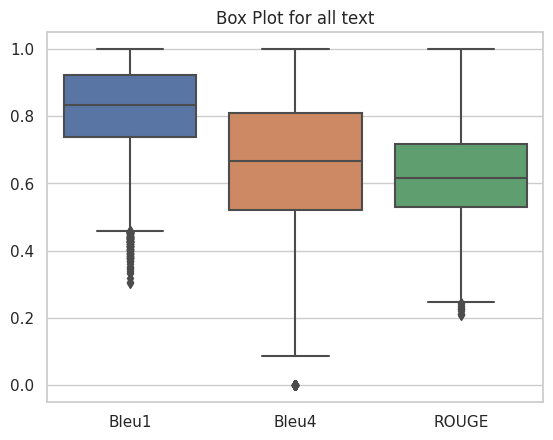

In [35]:
sns.boxplot(data=full_metric)
plt.title("Box Plot for all text")

In [38]:
full_metric.keys()

Index(['Bleu1', 'Bleu4', 'ROUGE'], dtype='object')

In [47]:
full_metric['Bleu4'].std()

0.20365125429450637

In [13]:
'''
Strategy:

Inter Caption Quality
Intra Caption Quality
'''

# Intra
def calculate_intra(data):
    '''
    data log is like {
        "img_name":{
            bleu1:[]
            bleu4:[]
            rouge:[]
            meteor:[]
            cider:[]
        },
    }
    '''
    data_log = {
        'Bleu1_mean':[],
        'Bleu1_std':[],
        'Bleu4_mean':[],
        'ROUGE':[],
    }
    for img_name,value in data.items():
        

SyntaxError: incomplete input (3935262020.py, line 25)